<a href="https://www.kaggle.com/code/arnabmukherjee853/bio-signal-analysis-smoking?scriptVersionId=193713473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-data/smoking.csv


In [2]:
df=pd.read_csv('/kaggle/input/smoking-data/smoking.csv')
df.tail()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1


In [3]:
df.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
df['dental caries'].value_counts()

dental caries
0    43811
1    11881
Name: count, dtype: int64

In [6]:
df['dental caries'] = df['dental caries'].map({0:False,1:True})
df['dental caries']

0        False
1        False
2        False
3        False
4        False
         ...  
55687     True
55688    False
55689    False
55690    False
55691    False
Name: dental caries, Length: 55692, dtype: bool

In [7]:
df['smoking']=df['smoking'].astype('object')

In [8]:
df.tail()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,True,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,False,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,False,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,False,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,False,Y,1


In [9]:
import matplotlib.pyplot as  plt
import seaborn as sns

In [10]:
df.drop(columns=['ID'],inplace=True)

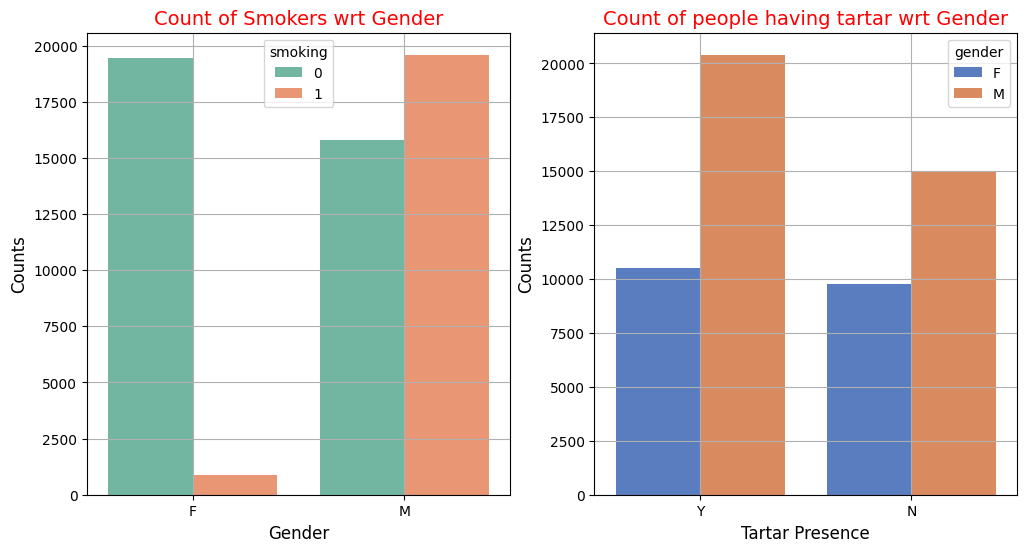

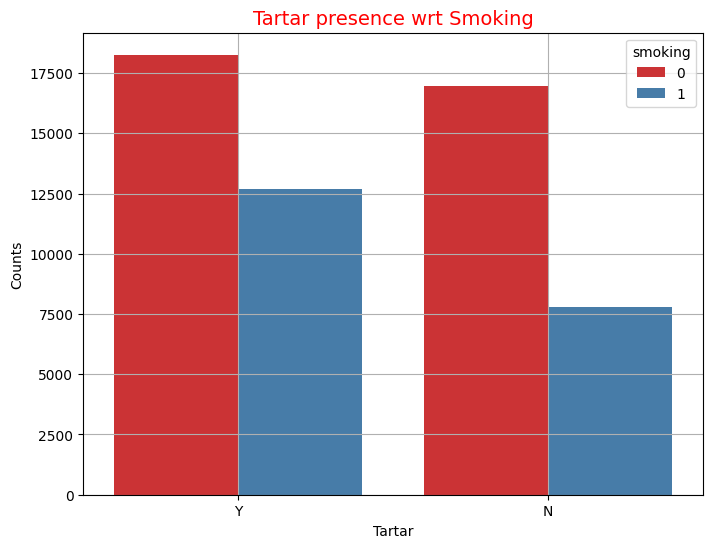

In [11]:
fig,(ax,bx)=plt.subplots(ncols=2,figsize=(12,6))
sns.countplot(data=df,x='gender',hue='smoking',ax=ax,palette='Set2')
sns.countplot(data=df,x='tartar',hue='gender',ax=bx,palette='muted')
ax.set_xlabel('Gender',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)
ax.set_title('Count of Smokers wrt Gender',fontsize=14,color='red')
ax.grid(True)
bx.set_xlabel('Tartar Presence',fontsize=12)
bx.set_ylabel('Counts',fontsize=12)
bx.set_title('Count of people having tartar wrt Gender',fontsize=14,color='red')
bx.grid(True)
fig,x=plt.subplots(figsize=(8,6))
sns.countplot(data=df,x='tartar',hue='smoking',ax=x,palette='Set1')
x.set_xlabel('Tartar')
x.set_ylabel('Counts')
x.set_title('Tartar presence wrt Smoking',fontsize=14,color='red')
x.grid(True)

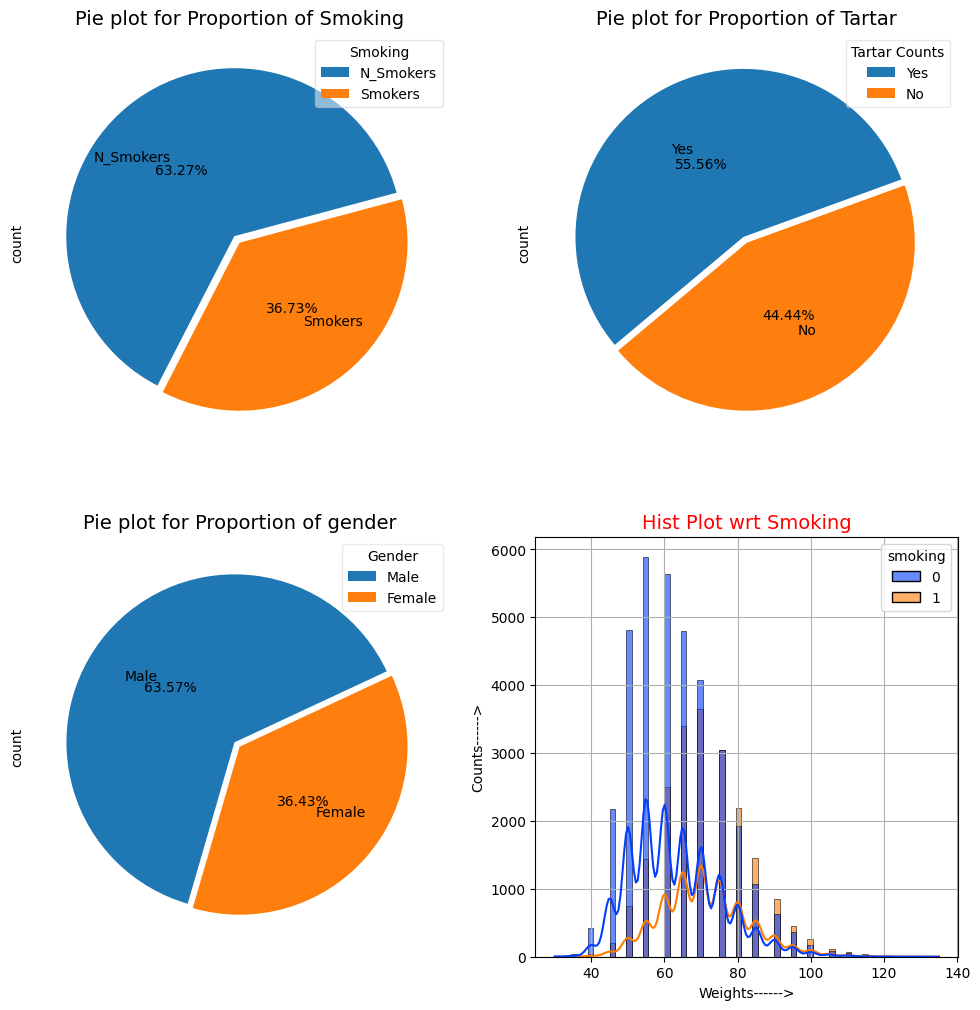

In [23]:
fig,((ax,bx),(cx,dx))=plt.subplots(ncols=2,figsize=(12,12),nrows=2)
df['smoking'].value_counts().plot.pie(autopct='%0.2f%%',
                                      pctdistance=0.5,
                                      explode=(0.05,0),
                                      ax=ax,
                                      startangle=15,
                                      labels=['N_Smokers','Smokers'],
                                      labeldistance=0.6)
ax.legend(loc='upper right',title='Smoking',framealpha=0.5)
df['tartar'].value_counts().plot.pie(autopct='%0.2f%%',
                                     pctdistance=0.5,
                                     explode=(0.04,0),
                                     ax=bx,
                                     startangle=20,
                                     labels=['Yes','No'],
                                     labeldistance=0.6)
bx.legend(loc='upper right',title='Tartar Counts',framealpha=0.45)
df['gender'].value_counts().plot.pie(autopct='%0.2f%%',
                                     pctdistance=0.5,
                                     explode=(0.04,0),
                                     ax=cx,
                                     startangle=25,
                                     labels=['Male','Female'],
                                     labeldistance=0.6)
cx.legend(loc='best',framealpha=0.4,title='Gender')
sns.histplot(data=df,x='weight(kg)',hue='smoking',ax=dx,palette='bright',bins=70,alpha=.6,kde=True)
ax.set_title('Pie plot for Proportion of Smoking',fontsize=14)
bx.set_title('Pie plot for Proportion of Tartar',fontsize=14)
cx.set_title('Pie plot for Proportion of gender',fontsize=14)
dx.set_xlabel('Weights------>')
dx.set_ylabel('Counts------>')
dx.set_title('Hist Plot wrt Smoking',color='red',fontsize=14)
dx.grid(True)

In [24]:
new_df=df[['smoking','tartar','gender']]
outer=new_df.smoking.value_counts()
print(outer)
print(outer.values)
print(outer.index)

smoking
0    35237
1    20455
Name: count, dtype: int64
[35237 20455]
Index([0, 1], dtype='object', name='smoking')


In [25]:
ni=new_df.groupby(['smoking'])['tartar'].value_counts()
print('middle pie values:: ',ni.values)
print('middle pie lavels:: ',ni.index.get_level_values(1))
ni

middle pie values::  [18260 16977 12680  7775]
middle pie lavels::  Index(['Y', 'N', 'Y', 'N'], dtype='object', name='tartar')


smoking  tartar
0        Y         18260
         N         16977
1        Y         12680
         N          7775
Name: count, dtype: int64

In [26]:
print(ni.index.get_level_values(1))

Index(['Y', 'N', 'Y', 'N'], dtype='object', name='tartar')


In [27]:
inner=new_df.groupby('smoking')[['tartar','gender']].value_counts()
print(inner.values)
print(inner.index.get_level_values(0))
print(inner.index.get_level_values(1))
print(inner.index.get_level_values(2))
inner

[ 9989  9443  8271  7534 12135  7461   545   314]
Index([0, 0, 0, 0, 1, 1, 1, 1], dtype='int64', name='smoking')
Index(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N'], dtype='object', name='tartar')
Index(['F', 'F', 'M', 'M', 'M', 'M', 'F', 'F'], dtype='object', name='gender')


smoking  tartar  gender
0        Y       F          9989
         N       F          9443
         Y       M          8271
         N       M          7534
1        Y       M         12135
         N       M          7461
         Y       F           545
         N       F           314
Name: count, dtype: int64

In [28]:
print(inner.index.get_level_values(2))
print(inner.values)

Index(['F', 'F', 'M', 'M', 'M', 'M', 'F', 'F'], dtype='object', name='gender')
[ 9989  9443  8271  7534 12135  7461   545   314]


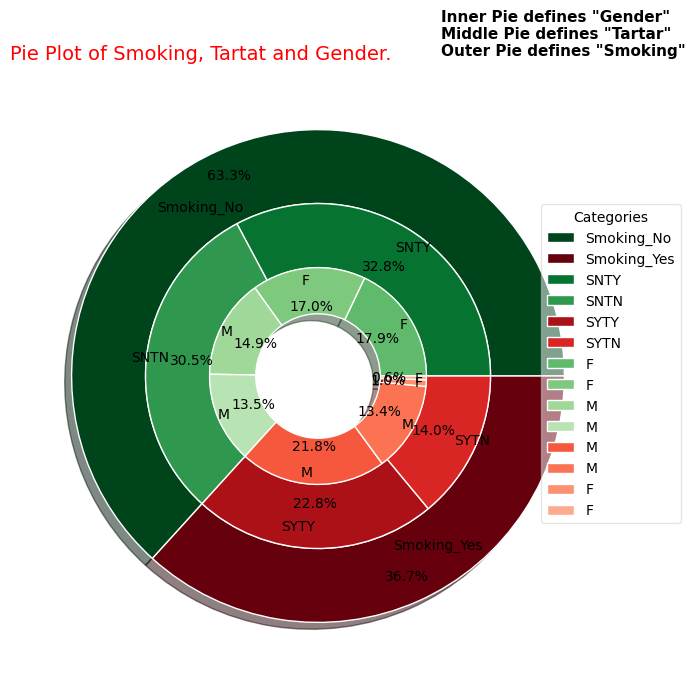

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_facecolor('white')
size = 0.3
a,b=[plt.cm.Greens,plt.cm.Reds]
ax.pie(outer.values, radius=1,
       labels=["Smoking_No","Smoking_Yes"],                                      # labels=outer.index
       autopct='%1.1f%%',
       pctdistance=0.89,
       wedgeprops=dict(width=size,edgecolor='white'),
       labeldistance=0.75,
       colors=[a(1.05),b(1.05)],
       shadow=True)
       

ax.pie(ni.values, radius=.7,
       autopct='%1.1f%%', 
       pctdistance=0.74,
       labels=['SNTY','SNTN','SYTY','SYTN'],                          #labels=ni.index.get_level_values(1),
       wedgeprops=dict(width=size/1.15,edgecolor='white'),
       labeldistance=0.87,
       colors=[a(0.85),a(0.7),b(0.85),b(0.7)])

ax.pie(inner.values,radius=.44,
       shadow=True,
       autopct='%1.1f%%',pctdistance=.65,
       labeldistance=0.89,
       labels=inner.index.get_level_values(2),
       wedgeprops=dict(width=size/1.6,edgecolor='white'),
       colors=[a(0.55),a(0.47),a(0.38),a(0.3),b(0.55),b(0.47),b(0.38),b(0.3)])

ax.set(aspect="equal")
ax.text(0.5, 1.3, 'Outer Pie defines "Smoking"', fontsize=11,fontweight='bold')
ax.text(0.5, 1.37, 'Middle Pie defines "Tartar"', fontsize=11,fontweight='bold')
ax.text(0.5, 1.44, 'Inner Pie defines "Gender"', fontsize=11,fontweight='bold')
plt.legend(loc='lower right',title='Categories',framealpha=0.5,bbox_to_anchor=(1.1,0.25))
plt.title('Pie Plot of Smoking, Tartat and Gender.',fontsize=14,color='red',loc='left')
plt.show()

In [30]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,False,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,False,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,False,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,False,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,False,N,0


In [31]:
df['dental caries'].value_counts()

dental caries
False    43811
True     11881
Name: count, dtype: int64

In [32]:
df['Urine protein'].value_counts()

Urine protein
1.0    52599
2.0     1795
3.0      940
4.0      260
5.0       88
6.0       10
Name: count, dtype: int64

In [33]:
df['Urine protein']=df['Urine protein'].astype('object')
df['hearing(right)']=df['hearing(right)'].astype('object')
df['hearing(left)']=df['hearing(left)'].astype('object')

In [34]:
cols=[i for i in df.columns if df[i].dtypes in ['int64','float64']]
print(len(cols))

18


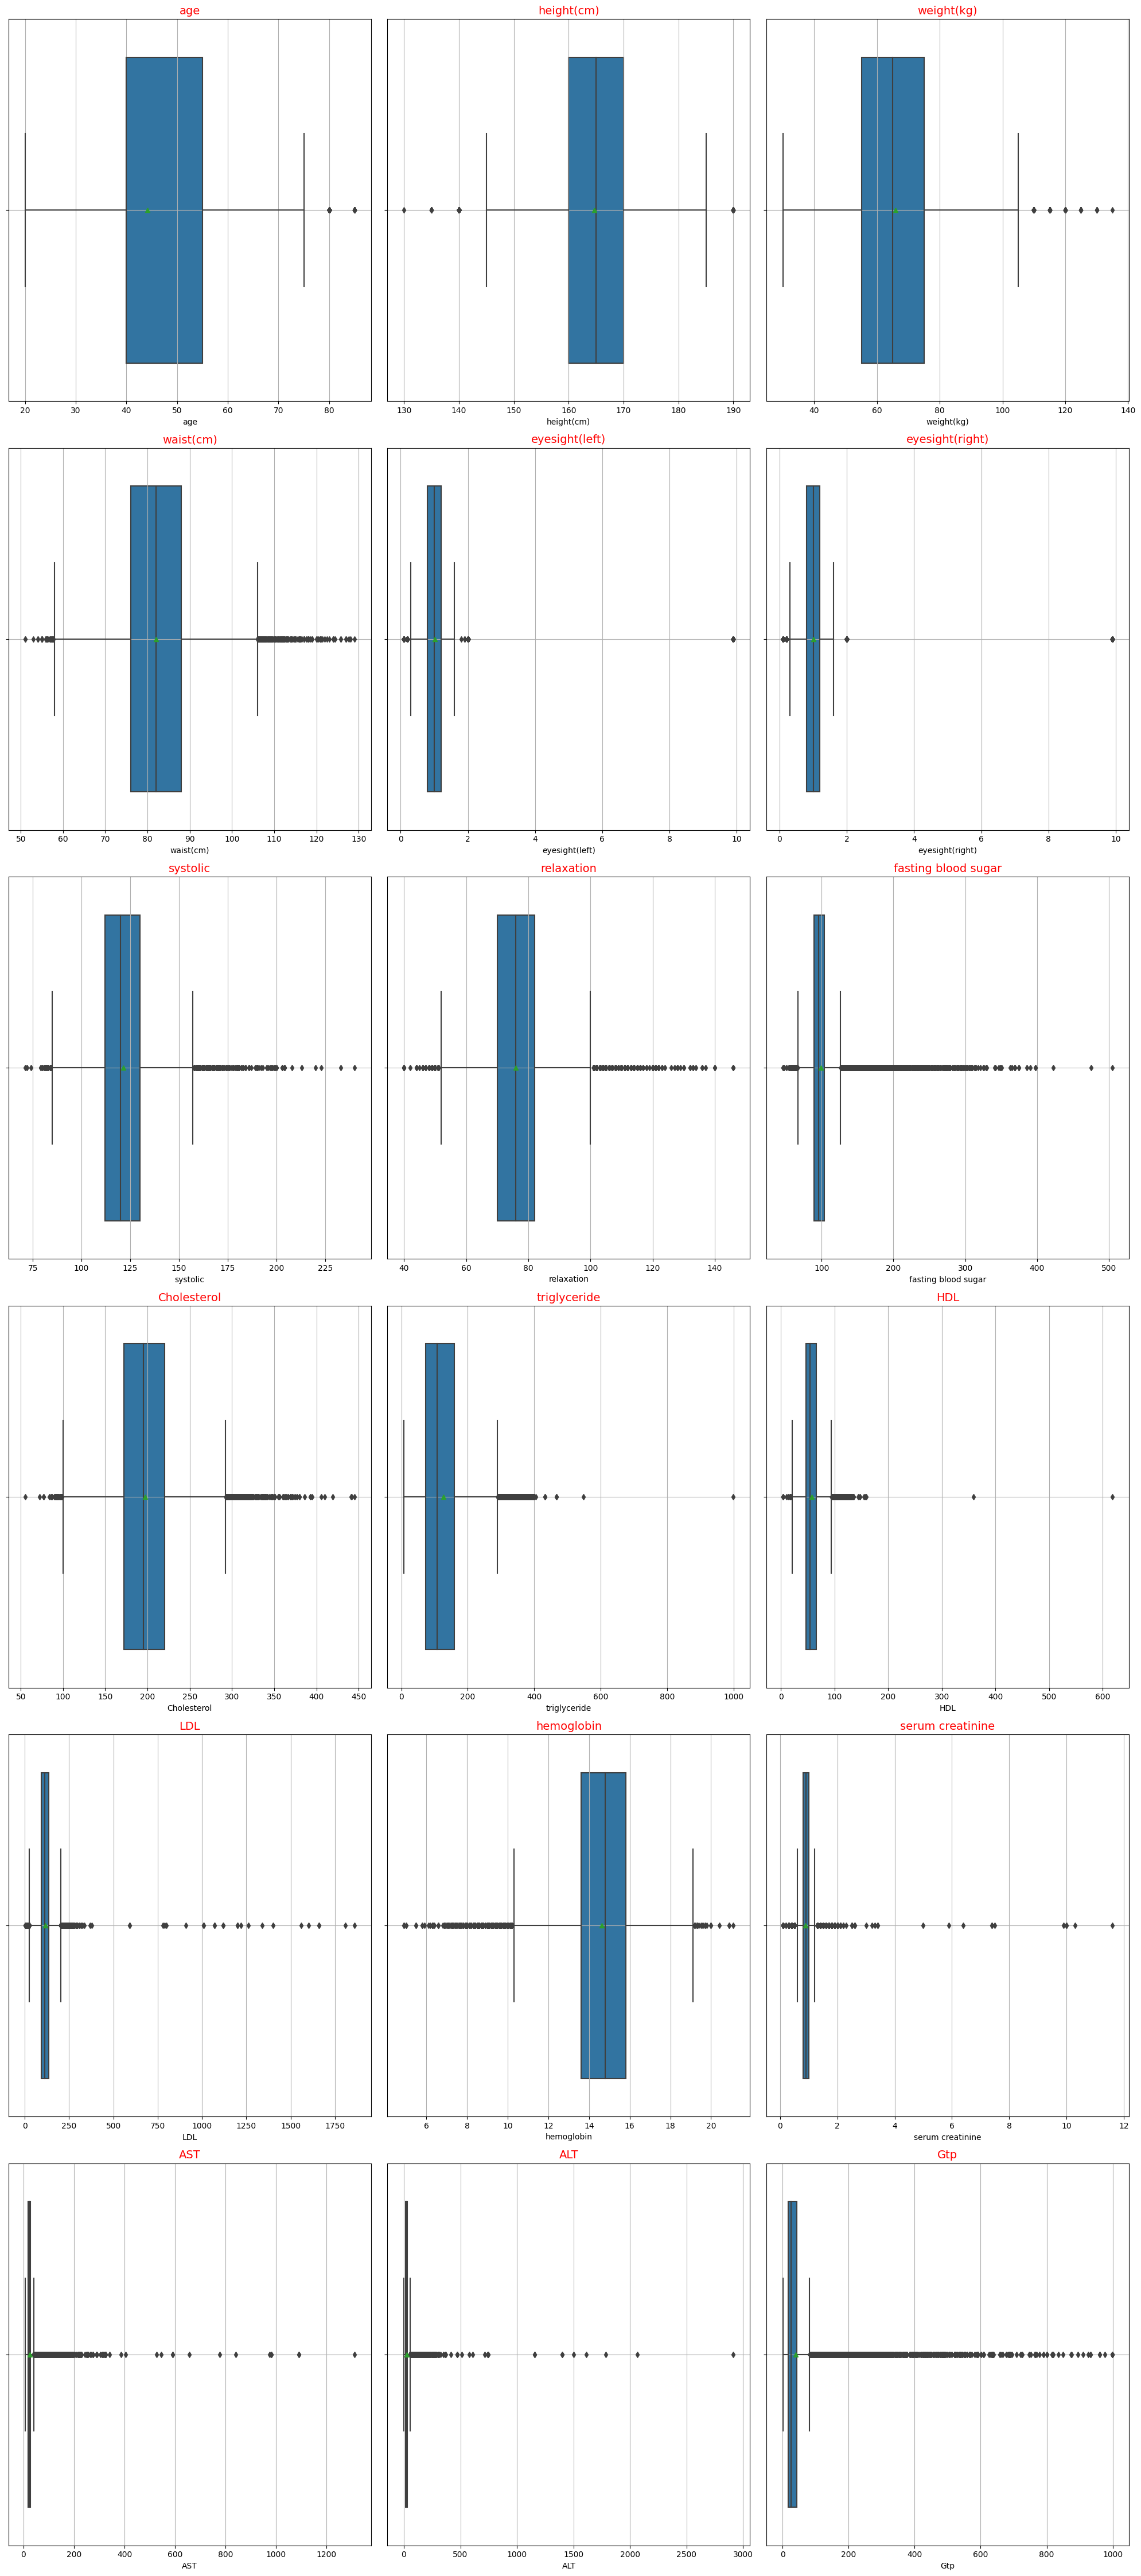

In [35]:
fig, axes = plt.subplots(6,3, figsize=(20,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.boxplot(data=df,x=cols[i],ax=ax,showmeans=True)
    ax.set_title(cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()

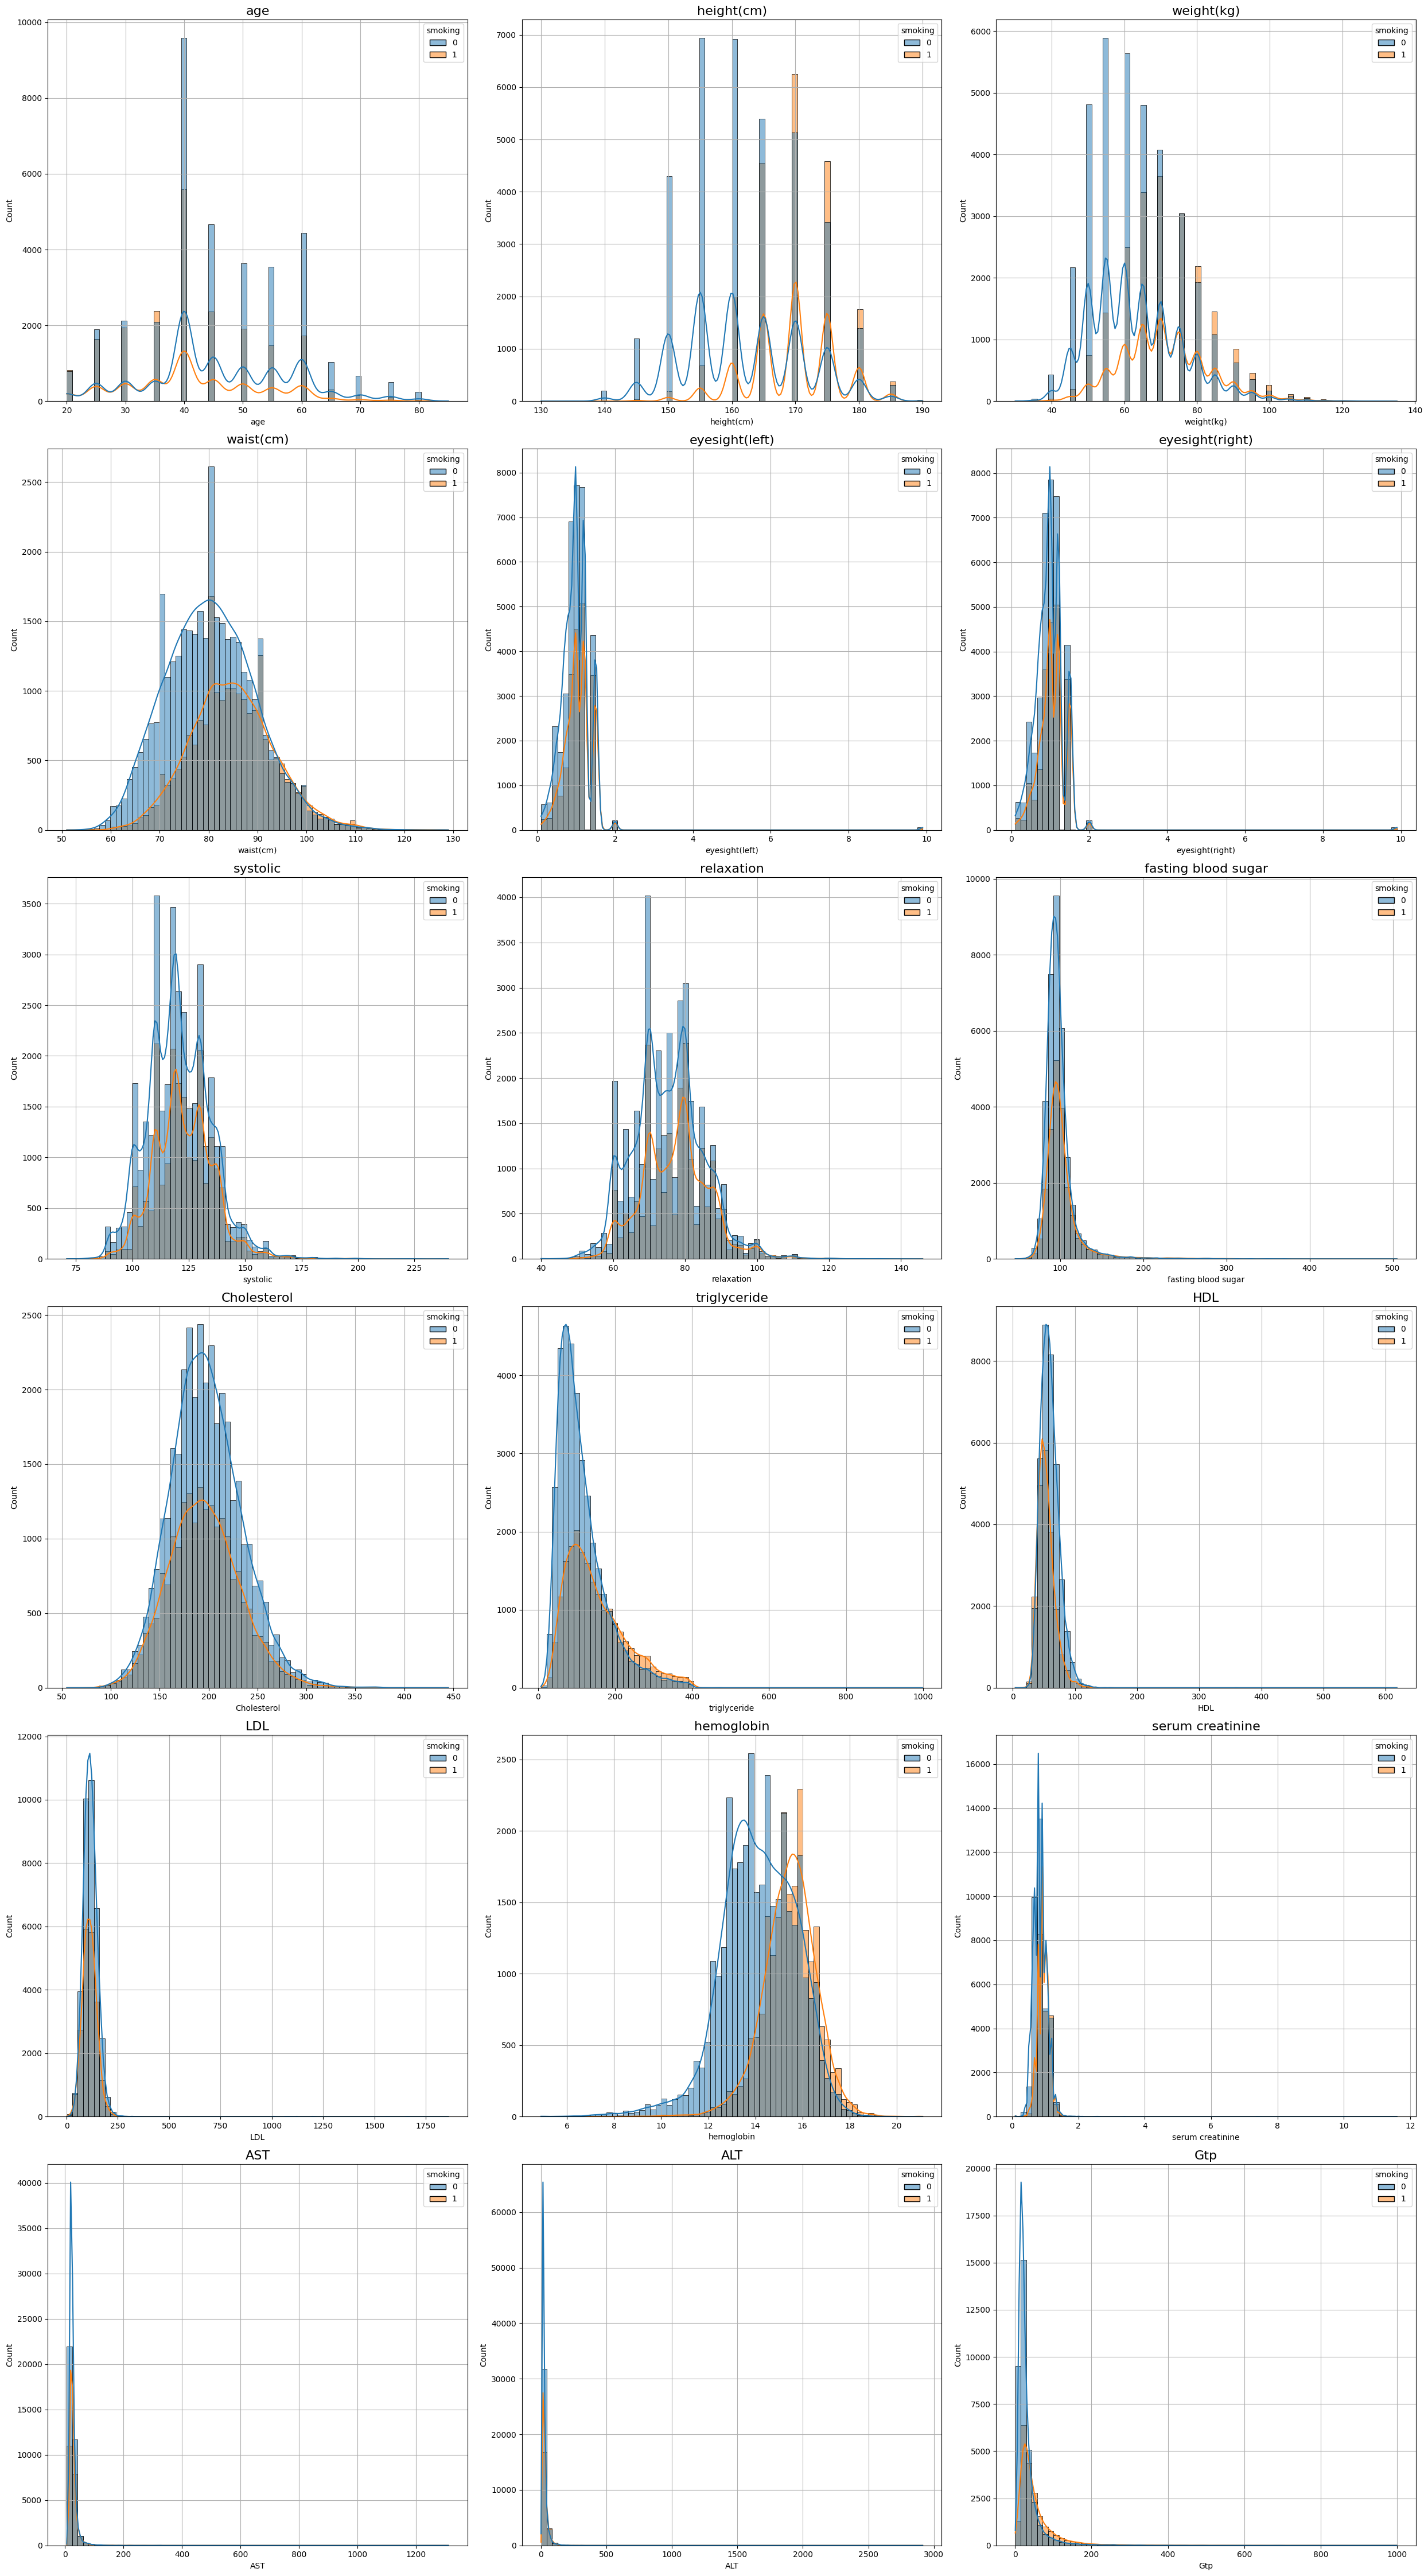

In [36]:
fig, axes = plt.subplots(6,3,figsize=(25,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.histplot(data=df,x=cols[i],ax=ax,bins=70,kde=True,color='red',hue='smoking')
    ax.set_title(cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

**Data Preprocession**

In [37]:
cat_col = df.select_dtypes(include=['object','bool']).columns
cat_col

Index(['gender', 'hearing(left)', 'hearing(right)', 'Urine protein', 'oral',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

**Outliers Handling**

In [39]:
def Outliers_handling(df):
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    outliers_row = df[cols].apply(lambda x:(x<lower_b[x.name])|(x>upper_b[x.name])).any(axis=1)
    cleaned_df = df[~outliers_row].copy()
    cleaned_df[cat_col] = df.loc[cleaned_df.index,cat_col]
    return cleaned_df

df = Outliers_handling(df)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,False,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,False,N,1
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,False,N,0
5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,128.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,False,Y,0
6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,True,Y,1


**Contineous data visualisation by Histogram after cleaning**

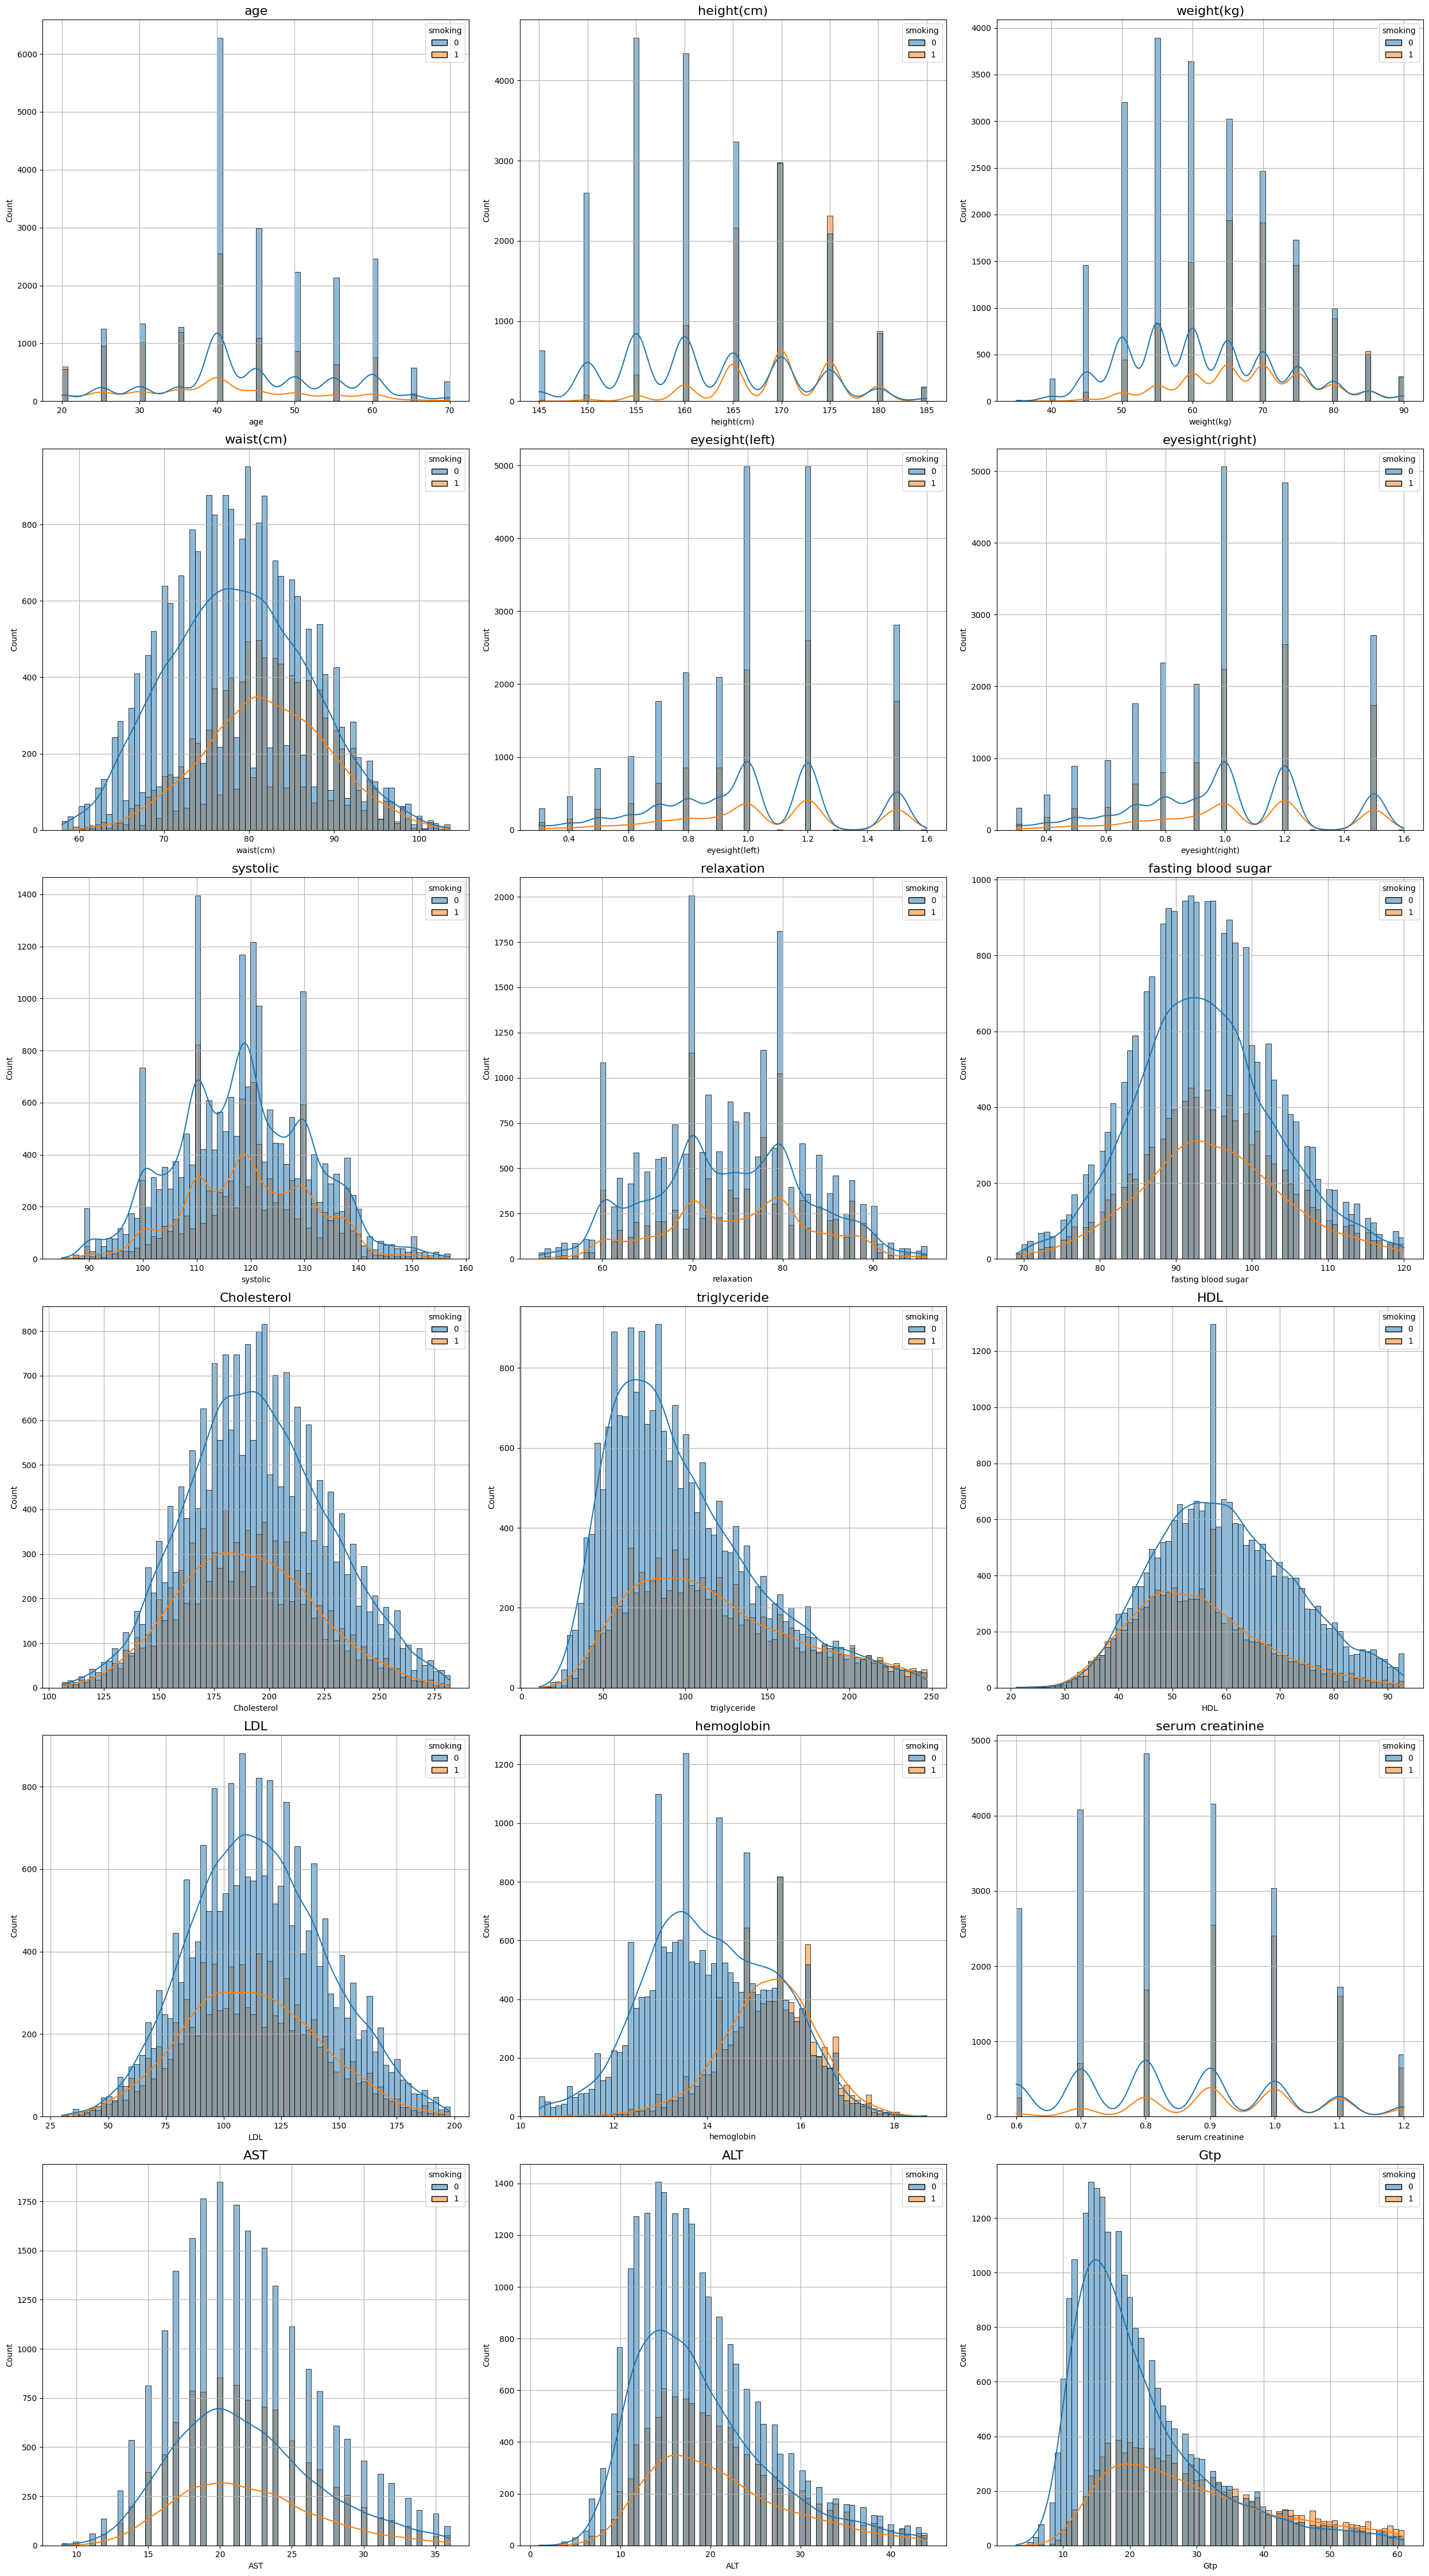

In [40]:
fig, axes = plt.subplots(6,3,figsize=(25,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.histplot(data=df,x=cols[i],ax=ax,bins=70,kde=True,color='red',hue='smoking')
    ax.set_title(cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

**Data visualisation by using Boxplot**

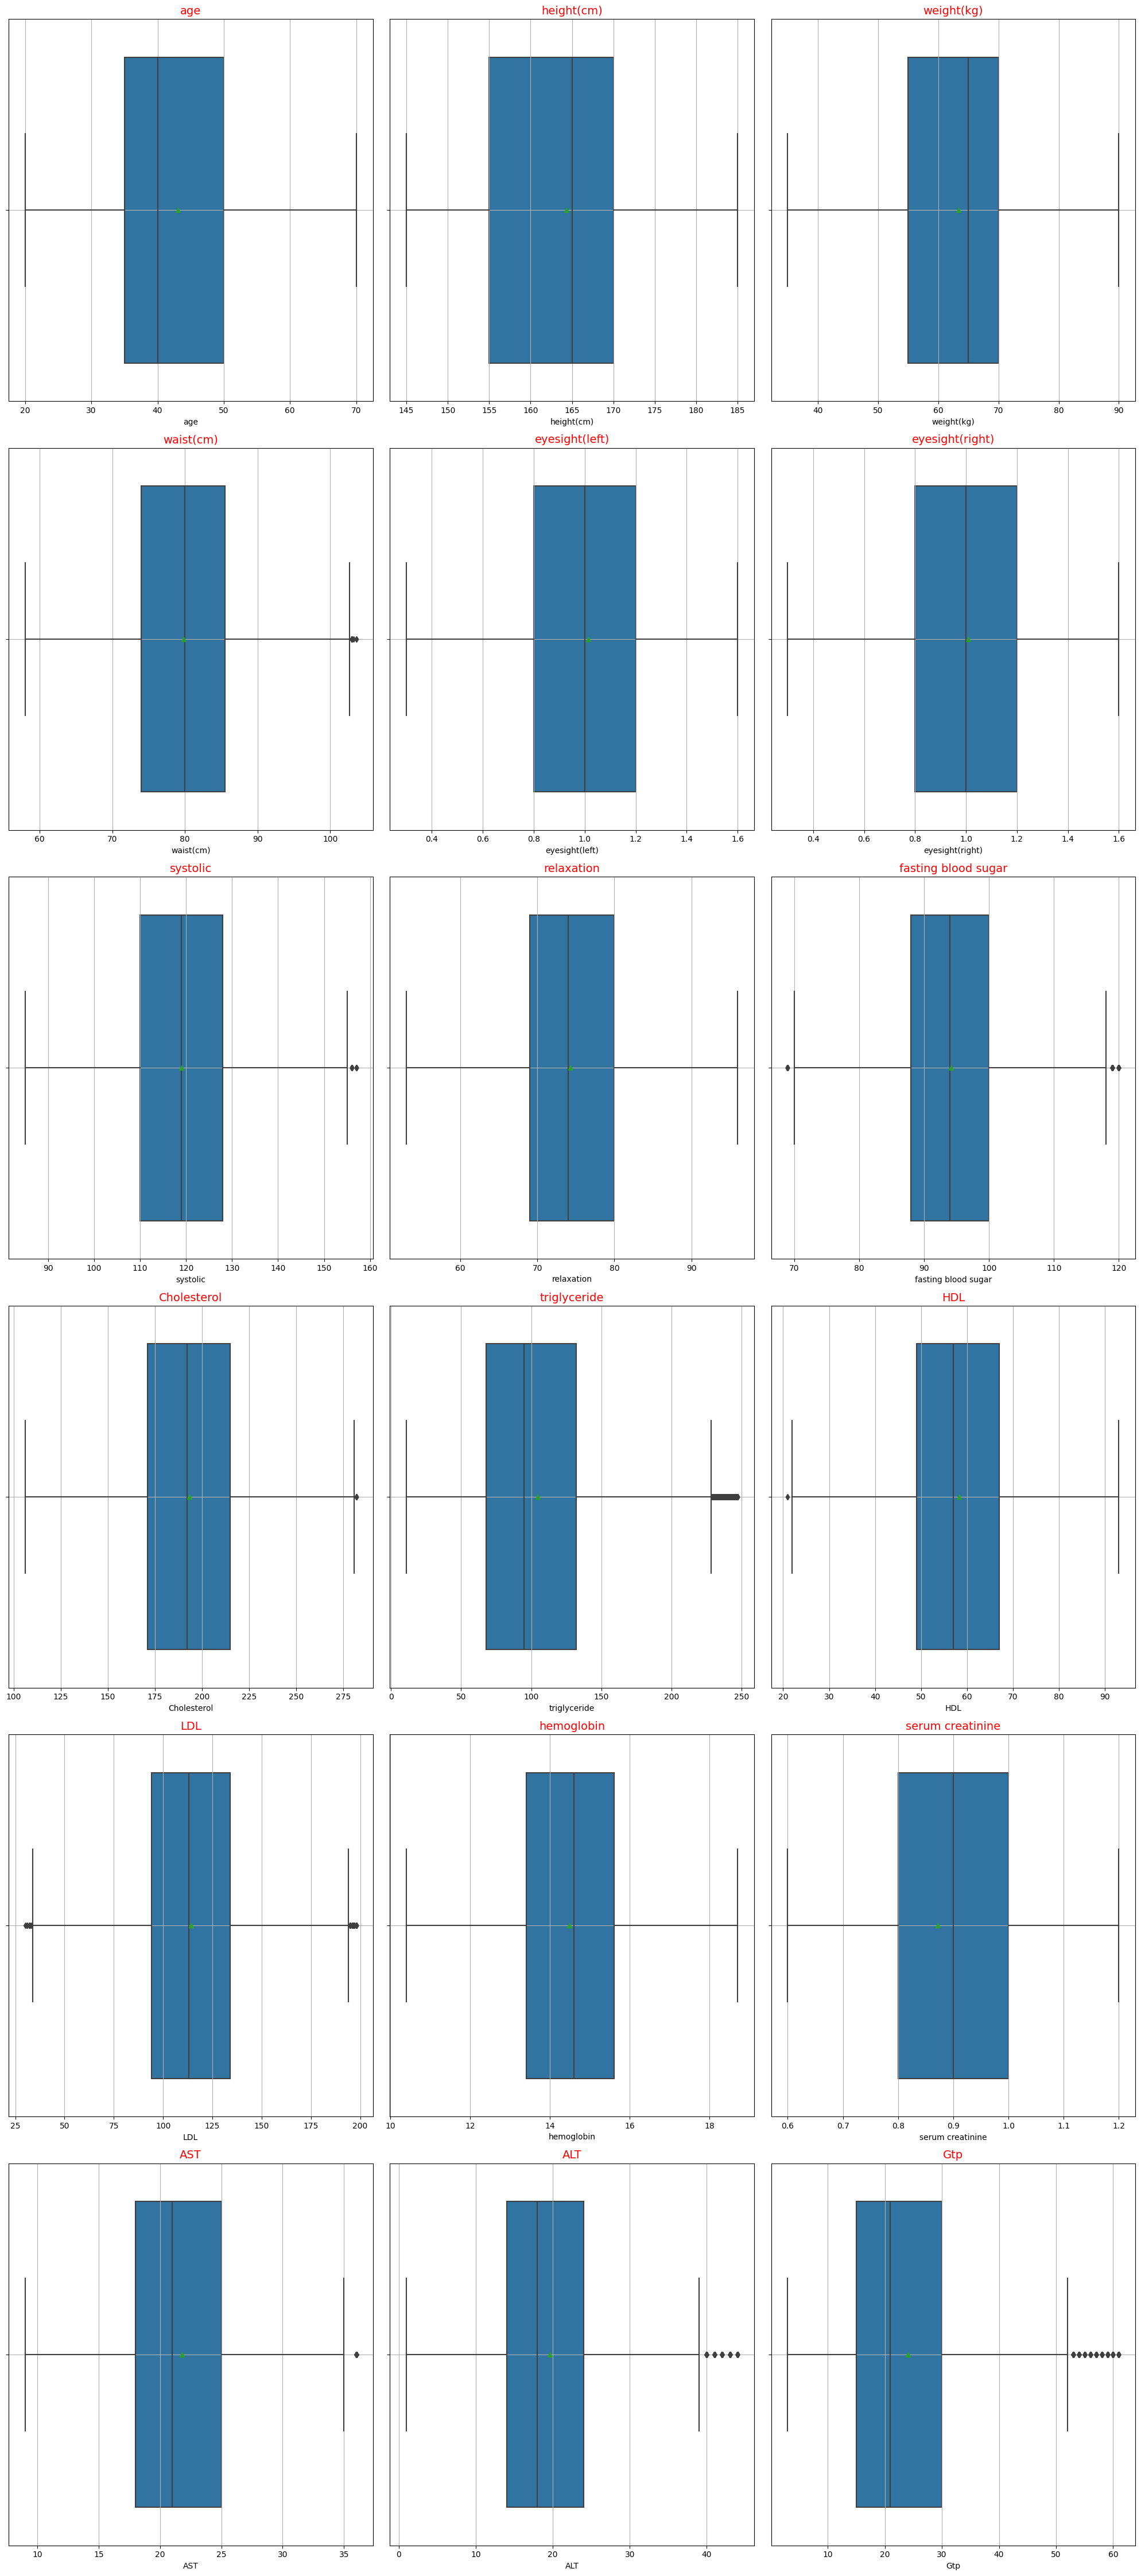

In [43]:
fig, axes = plt.subplots(6,3, figsize=(20,45))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.boxplot(data=df,x=cols[i],ax=ax,showmeans=True,)
    ax.set_title(cols[i],fontsize=14,color='red')
    ax.grid(True)
plt.tight_layout()

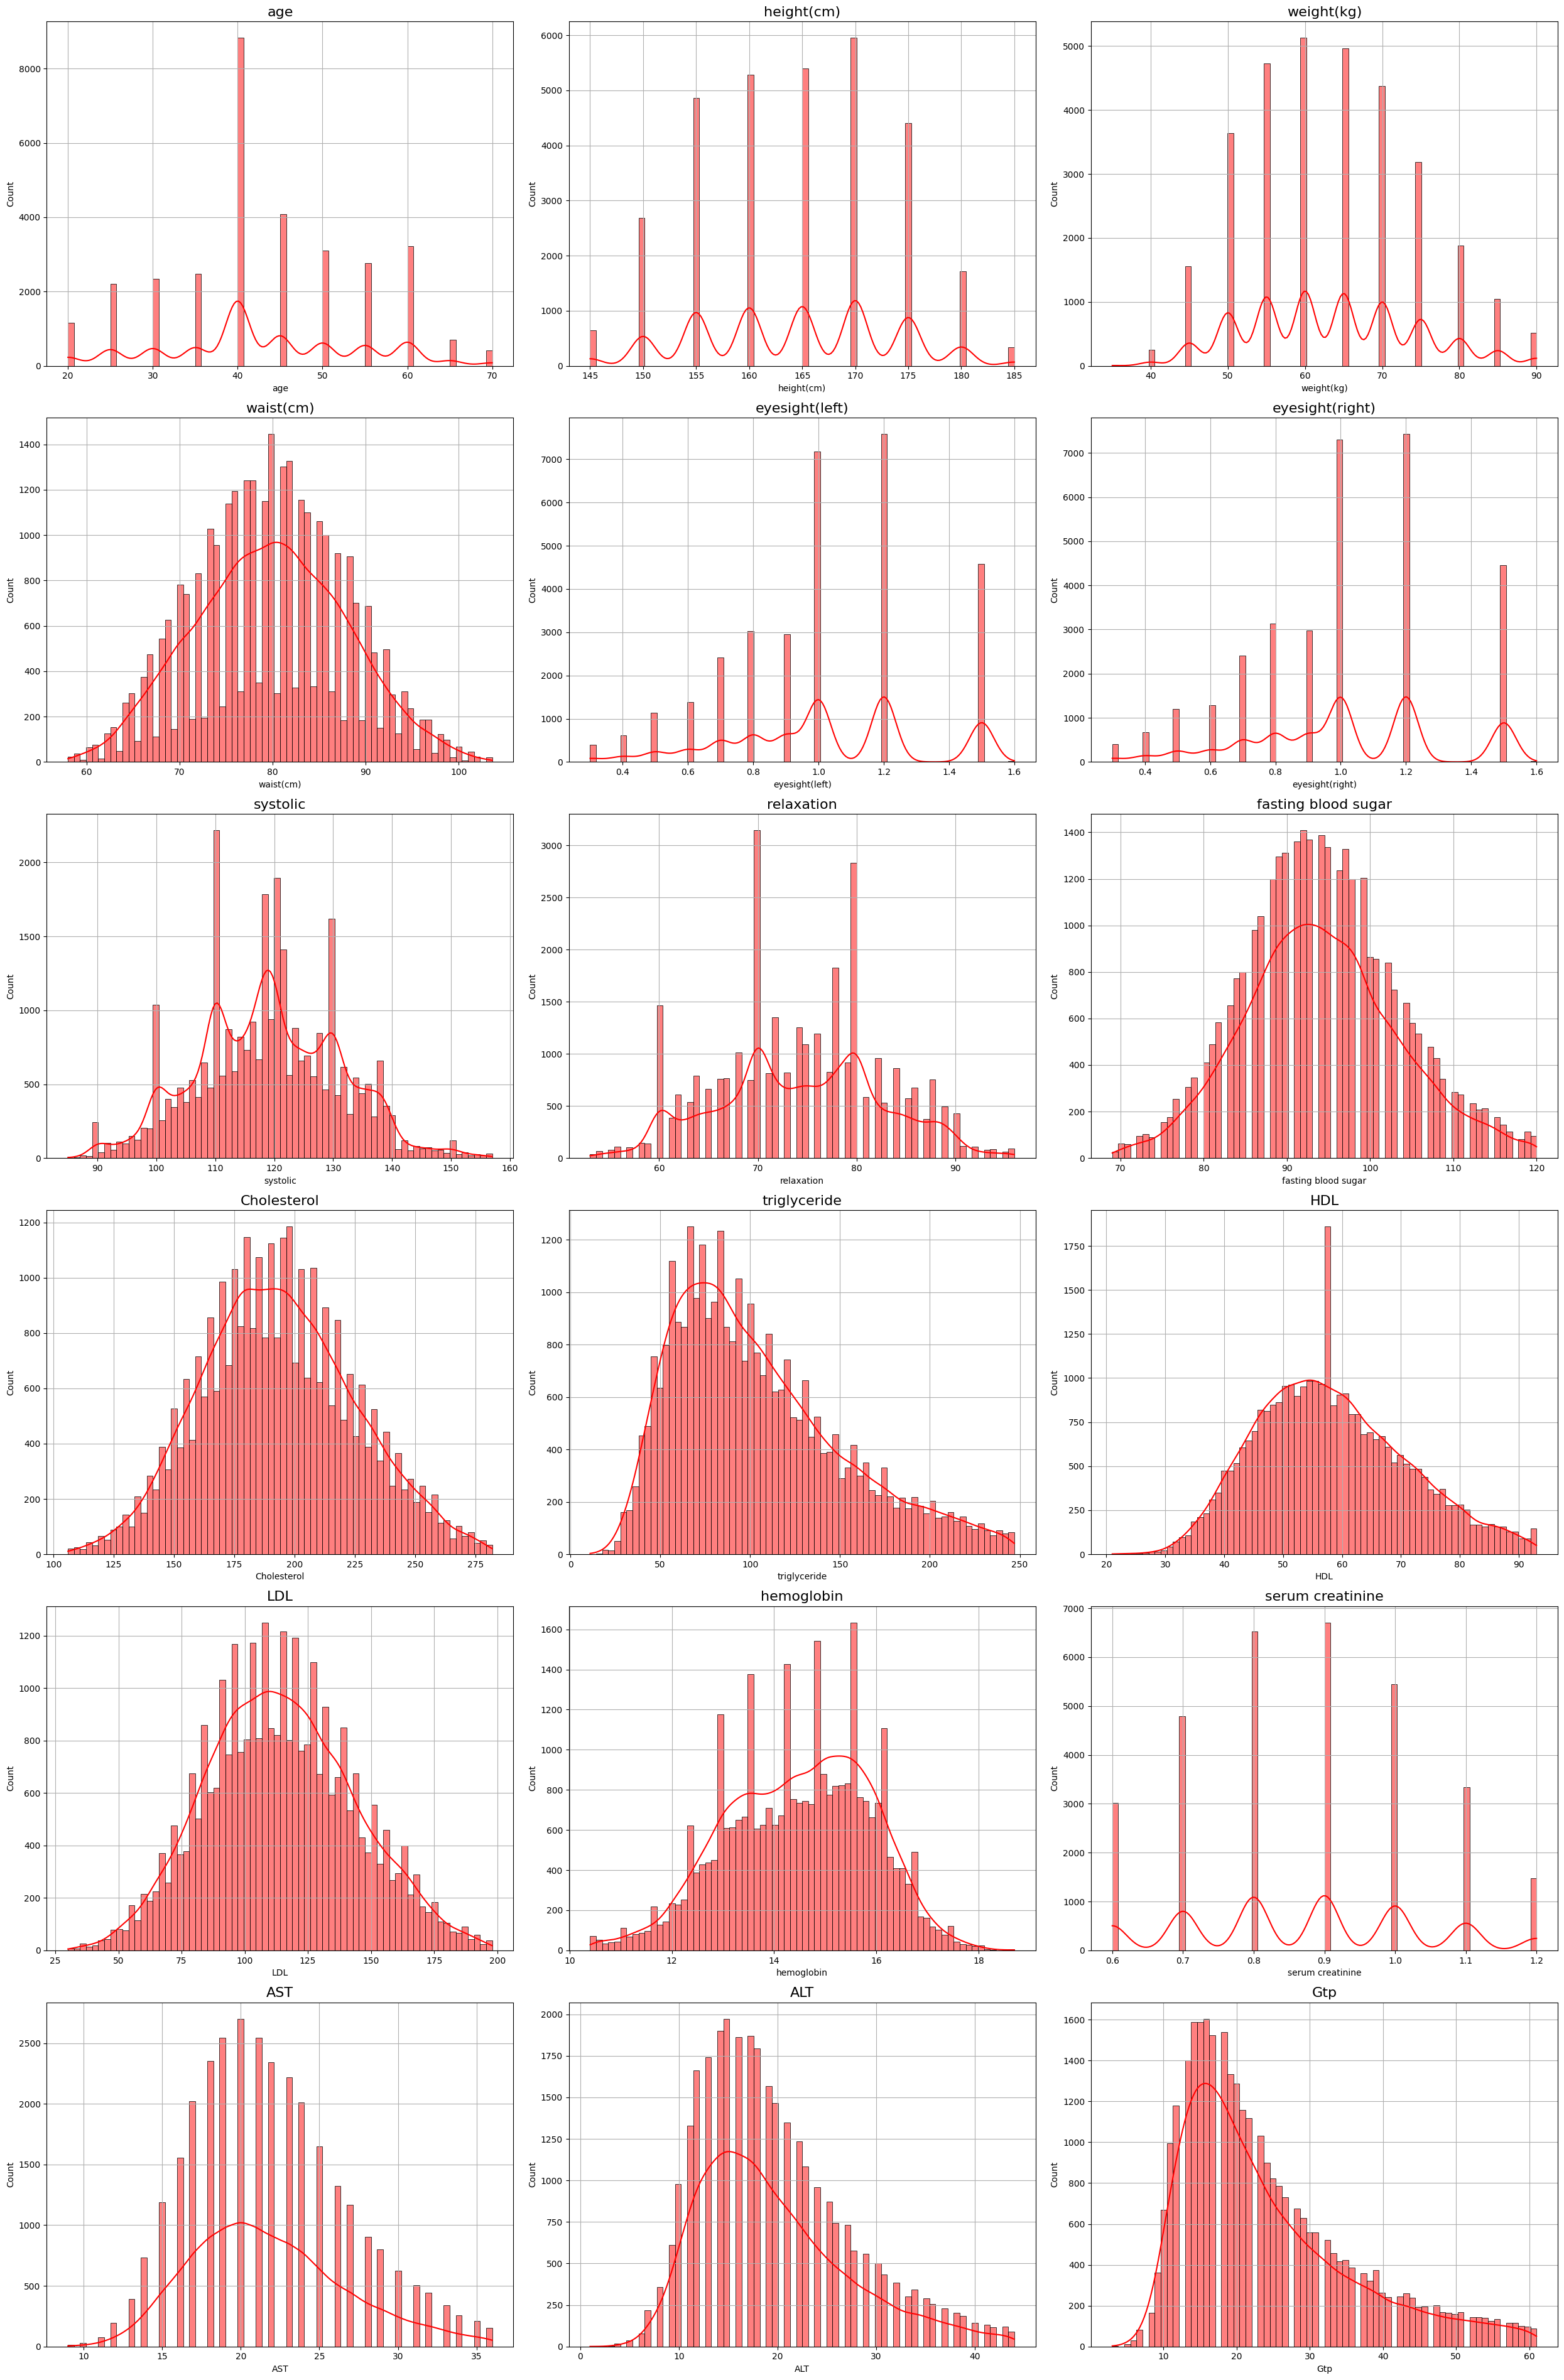

In [45]:
fig, axes = plt.subplots(6,3,figsize=(25,38))  
for i,ax in enumerate(axes.flatten()):
    if i>=len(cols):
        break
    sns.histplot(data=df,x=cols[i],ax=ax,bins=70,kde=True,color='red')
    ax.set_title(cols[i],fontsize=16)
    ax.grid(True)
plt.tight_layout()

In [46]:
df['height(cm)'].value_counts()

height(cm)
170    5952
165    5403
160    5289
155    4863
175    4406
150    2682
180    1717
145     645
185     342
Name: count, dtype: int64

In [47]:
df[cat_col].columns

Index(['gender', 'hearing(left)', 'hearing(right)', 'Urine protein', 'oral',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

**PreProcessing and building Pipepile**

In [48]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from category_encoders import TargetEncoder

In [50]:
Pipeline_num = Pipeline(
    steps=[('Union_num',
    FeatureUnion(transformer_list=[('MinMax', ColumnTransformer([('MinMax',MinMaxScaler(),
                                                                ['age','height(cm)','weight(kg)','serum creatinine'])])), 
                                            ('StandrdScaler', ColumnTransformer([('StandardSc',StandardScaler(),
                                                                                ['waist(cm)','systolic','relaxation',
                                                                                 'fasting blood sugar','Cholesterol',
                                                                                 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
                                                                                 'AST','ALT','Gtp']), 
                                                                                ]))]))])

Pipeline_cat = Pipeline(
    steps=[('Union_cat', FeatureUnion(transformer_list=[('OneHot', ColumnTransformer([('OneHot',
                                                                                       OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                                                                                   ['gender', 'oral', 'dental caries', 'tartar'])], 
                                                                                   remainder='drop')), 
                                              ('OrdinalEncoder', ColumnTransformer([('Ordinal',OrdinalEncoder(),
                                                                                    ['Urine protein'])],remainder='drop'))]))])

CT = make_column_transformer(
    (Pipeline_num, ['age', 'height(cm)','weight(kg)','waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']),
    (Pipeline_cat, ['gender', 'Urine protein', 'oral','dental caries','tartar']), 
    remainder='drop'
)
CT

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('Union_num',
                                                  FeatureUnion(transformer_list=[('MinMax',
                                                                                  ColumnTransformer(transformers=[('MinMax',
                                                                                                                   MinMaxScaler(),
                                                                                                                   ['age',
                                                                                                                    'height(cm)',
                                                                                                                    'weight(kg)',
                                                                                                                    'serum '
                                                                                                                    'creatinine'])])),
                                                                                 ('StandrdScaler',
                                                                                  ColumnTransformer(transformers=[('StandardSc',
                                                                                                                   StandardScaler(),
                                                                                                                   ['waist(cm)',
                                                                                                                    'systolic',
                                                                                                                    'relaxation',
                                                                                                                    'f...
                                                  FeatureUnion(transformer_list=[('OneHot',
                                                                                  ColumnTransformer(transformers=[('OneHot',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse_output=False),
                                                                                                                   ['gender',
                                                                                                                    'oral',
                                                                                                                    'dental '
                                                                                                                    'caries',
                                                                                                                    'tartar'])])),
                                                                                 ('OrdinalEncoder',
                                                                                  ColumnTransformer(transformers=[('Ordinal',
                                                                                                                   OrdinalEncoder(),
                                                                                                                   ['Urine '
                                                                                                                    'protein'])]))]))]),
                                 ['gender', 'Urine protein', 'oral',
                                  'dental caries', 'tartar'])])

In [51]:
df=df.drop(columns=['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)'],inplace=False)
df

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,114.0,73.0,94.0,215.0,82.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,False,Y,0
2,M,55,170,60,80.0,138.0,86.0,89.0,242.0,182.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,False,N,1
4,F,40,155,60,86.0,120.0,74.0,80.0,184.0,74.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,False,N,0
5,M,30,180,75,85.0,128.0,76.0,95.0,217.0,199.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,False,Y,0
6,M,40,160,60,85.5,116.0,82.0,94.0,226.0,68.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,True,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,F,60,150,50,75.0,102.0,60.0,85.0,179.0,53.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,False,Y,0
55687,F,40,170,65,75.0,110.0,68.0,89.0,213.0,99.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,True,Y,0
55688,F,45,160,50,70.0,101.0,62.0,89.0,166.0,69.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,False,Y,0
55690,M,60,165,60,78.0,133.0,76.0,107.0,210.0,79.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,False,N,0


In [52]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.smoking
y=y.astype(int)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.18,random_state=13)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(25665, 21)
(5634, 21)
(25665,)
(5634,)


In [53]:
print(xtrain.columns)
print(xtest.columns)

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar'],
      dtype='object')
Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'oral', 'dental caries', 'tartar'],
      dtype='object')


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, confusion_matrix , ConfusionMatrixDisplay

In [55]:
param_rs_gs_dt = {'model__criterion':['entropy','gini','log_loss'],
                  'model__max_depth': range(4,28),
                  'model__splitter':['best','random']
}
param_gs_rs_kn = { 'model__n_neighbors':[i for i in range(7,24,2)],
                 'model__weights':['uniform','distance'],
                 'model__metric':['euclidean','manhatten','minkowski']}

In [62]:
models={'Logistic Regression': Pipeline([('transformer',CT),('model',LogisticRegression())]),
        'Decision Tree': Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
        'Random Forest': Pipeline([('transformer',CT),('model',RandomForestClassifier(n_estimators=900,criterion='entropy'))]),
        'Nearest neighbors': Pipeline([('transformer',CT),('model',KNeighborsClassifier(n_neighbors=21, algorithm='auto'))]),
        'SVM': Pipeline([('transformer',CT),('model',SVC(kernel='rbf',probability=True))])}
        
models.items()

# 'GridSearchCvKN': GridSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),param_grid=param_gs_rs_kn,cv=4,),
# 'GridSearchCVDT': GridSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),param_grid=param_rs_gs_dt,cv=4,),
# 'RandomizedSearchDT': RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),param_distributions=param_rs_gs_dt,cv = 4,n_iter=7,random_state=42,),
# 'RandomizedSearchCVKN': RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),param_distributions=param_gs_rs_kn,cv=4,)}

dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Union_num',
                                                                   FeatureUnion(transformer_list=[('MinMax',
                                                                                                   ColumnTransformer(transformers=[('MinMax',
                                                                                                                                    MinMaxScaler(),
                                                                                                                                    ['age',
                                                                                                                                     'height(cm)',
                                                                                                      

In [63]:
CT

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('Union_num',
                                                  FeatureUnion(transformer_list=[('MinMax',
                                                                                  ColumnTransformer(transformers=[('MinMax',
                                                                                                                   MinMaxScaler(),
                                                                                                                   ['age',
                                                                                                                    'height(cm)',
                                                                                                                    'weight(kg)',
                                                                                                                    'serum '
                                                                                                                    'creatinine'])])),
                                                                                 ('StandrdScaler',
                                                                                  ColumnTransformer(transformers=[('StandardSc',
                                                                                                                   StandardScaler(),
                                                                                                                   ['waist(cm)',
                                                                                                                    'systolic',
                                                                                                                    'relaxation',
                                                                                                                    'f...
                                                  FeatureUnion(transformer_list=[('OneHot',
                                                                                  ColumnTransformer(transformers=[('OneHot',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse_output=False),
                                                                                                                   ['gender',
                                                                                                                    'oral',
                                                                                                                    'dental '
                                                                                                                    'caries',
                                                                                                                    'tartar'])])),
                                                                                 ('OrdinalEncoder',
                                                                                  ColumnTransformer(transformers=[('Ordinal',
                                                                                                                   OrdinalEncoder(),
                                                                                                                   ['Urine '
                                                                                                                    'protein'])]))]))]),
                                 ['gender', 'Urine protein', 'oral',
                                  'dental caries', 'tartar'])])

Fitting Logistic Regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Name:: Logistic Regression
Accuracy Score of Logistic Regression is 0.7515086971955982
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3866
           1       0.61      0.59      0.60      1768

    accuracy                           0.75      5634
   macro avg       0.71      0.71      0.71      5634
weighted avg       0.75      0.75      0.75      5634

************************************************************************************************************************
************************************************************************************************************************
Fitting Decision Tree
Model Name:: Decision Tree
Accuracy Score of Decision Tree is 0.7971246006389776
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3866
           1       0.67      0.68      0.68      1768

    accuracy                           0.80      5634
   macro avg     

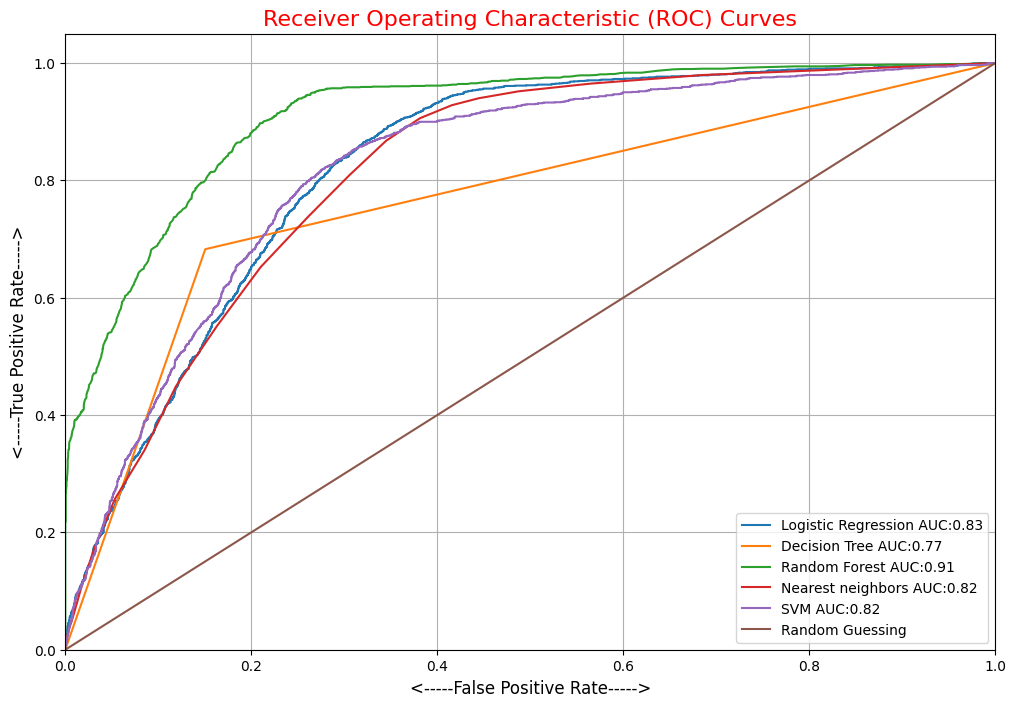

In [64]:
plt.figure(figsize=(12,8))
for model_name,model in models.items():
    print(f'Fitting {model_name}')
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(xtrain,ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
    else :
        best_model=model
        best_model.fit(xtrain,ytrain)
    ypred=best_model.predict(xtest)
    ypred_proba=best_model.predict_proba(xtest)[:,1]
    
    fpr,tpr,_ = roc_curve(ytest,ypred_proba)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f'{model_name} AUC:{roc_auc:.2f}')
    
    print(f'Model Name:: {model_name}')
    print(f'Accuracy Score of {model_name} is {accuracy_score(ytest,ypred)}')
    print(classification_report(ytest,ypred))
    print('*****'*24)
    print('*****'*24)
    
plt.plot([0,1],[0,1],label='Random Guessing')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('<-----False Positive Rate----->',fontsize=12)
plt.ylabel('<-----True Positive Rate----->',fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves',fontsize=16,color='red')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler

In [71]:
Transformed_data = CT.fit_transform(df)
X = Transformed_data
y = df.smoking.astype('int')
print(y)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=.85,random_state=15)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

0        0
2        1
4        0
5        0
6        1
        ..
55686    0
55687    0
55688    0
55690    0
55691    1
Name: smoking, Length: 31299, dtype: int64
(26604, 24)
(4695, 24)
(26604,)
(4695,)


In [100]:
def Scheduler(epoch,lr):
    lr1 = lr * 0.1
    lr2 = lr1 * 0.1
    if epoch < 50:
        return lr
    elif 51 <= epoch < 80:
        return lr1
    else:
        return lr2

model = tf.keras.models.Sequential([
    Input(shape=(24,)),
    Dense(100, activation='relu'),
    Dropout(0.15),
    Dense(200, activation='relu'),
    Dropout(0.15),
    Dense(400, activation='elu'),
    Dropout(0.15),
    Dense(650, activation='relu'),
    Dropout(0.15),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 100)               2500      
                                                                 
 dropout_52 (Dropout)        (None, 100)               0         
                                                                 
 dense_66 (Dense)            (None, 200)               20200     
                                                                 
 dropout_53 (Dropout)        (None, 200)               0         
                                                                 
 dense_67 (Dense)            (None, 400)               80400     
                                                                 
 dropout_54 (Dropout)        (None, 400)               0         
                                                                 
 dense_68 (Dense)            (None, 650)             

In [101]:

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
lr_scheduler = LearningRateScheduler(Scheduler)
NNM = model.fit(Xtrain,ytrain,
                validation_data = (Xtest,ytest),
                epochs = 100,
                callbacks = lr_scheduler,
                batch_size = 50,)

Epoch 1/100
533/533 [==============================] - 7s 11ms/step - loss: 0.4683 - accuracy: 0.7449 - val_loss: 0.4367 - val_accuracy: 0.7572 - lr: 0.0010
Epoch 2/100
533/533 [==============================] - 5s 10ms/step - loss: 0.4526 - accuracy: 0.7561 - val_loss: 0.4349 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 3/100
533/533 [==============================] - 5s 10ms/step - loss: 0.4458 - accuracy: 0.7617 - val_loss: 0.4333 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 4/100
533/533 [==============================] - 5s 10ms/step - loss: 0.4437 - accuracy: 0.7634 - val_loss: 0.4359 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 5/100
533/533 [==============================] - 5s 10ms/step - loss: 0.4412 - accuracy: 0.7683 - val_loss: 0.4353 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 6/100
533/533 [==============================] - 5s 10ms/step - loss: 0.4389 - accuracy: 0.7691 - val_loss: 0.4332 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 7/100
533/533 [==============================] - 5s 

832/832 [==============================] - 3s 3ms/step - loss: 0.2613 - accuracy: 0.8995
Train Score [0.2613118588924408, 0.8994511961936951]
147/147 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.7847
Test Score [0.4358859658241272, 0.784664511680603]


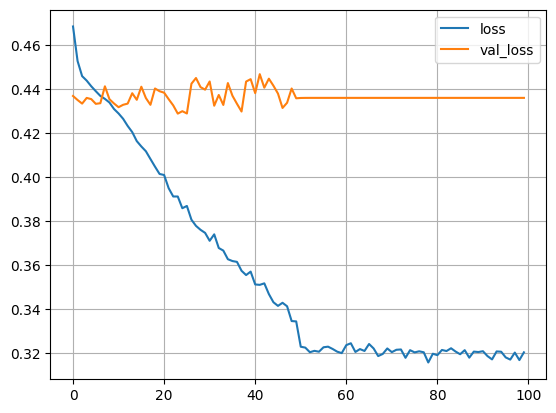

In [102]:
print("Train Score", model.evaluate(Xtrain,ytrain))
print("Test Score", model.evaluate(Xtest,ytest))
plt.plot(NNM.history['loss'], label='loss')
plt.plot(NNM.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)
plt.show()

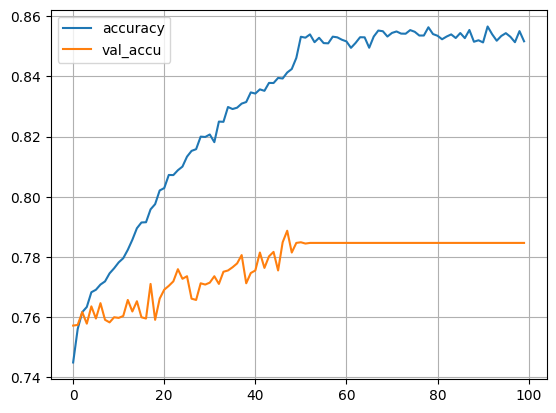

In [103]:
plt.plot(NNM.history['accuracy'], label='accuracy')
plt.plot(NNM.history['val_accuracy'], label='val_accu')
plt.legend()
plt.grid(True)

147/147 [==============================] - 0s 3ms/step


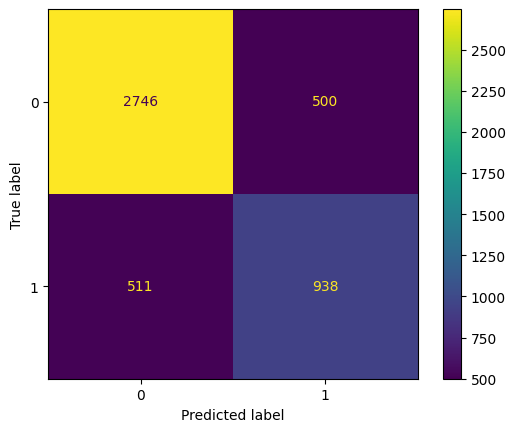

In [104]:
y_nn_probs = model.predict(Xtest)
Ypred = np.where(y_nn_probs>0.5,1,0)
cm = confusion_matrix(ytest, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

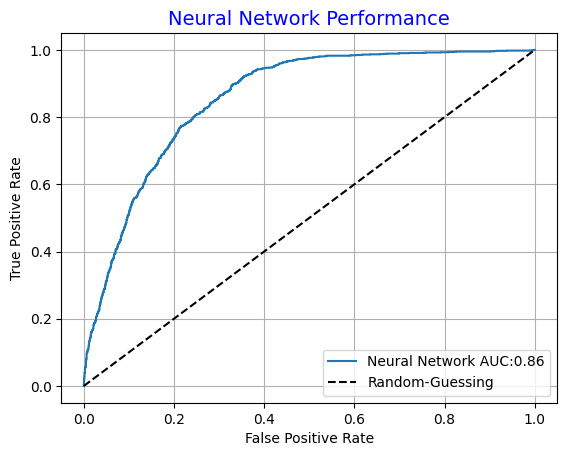

In [105]:
fpr,tpr,_ = roc_curve(ytest,y_nn_probs)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'Neural Network AUC:{roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--',label='Random-Guessing')
plt.title('Neural Network Performance',fontsize=14, color='blue')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
# y=df['smoking']
# from sklearn.ensemble import ExtraTreesClassifier
# ETC=ExtraTreesClassifier()
# ETC.fit(x,y)
# df_new=pd.Series(ETC.feature_importances_,index=x.columns)
# plt.figure(figsize=(9,10))
# df_new.nlargest(10).plot(kind='bar')
# plt.grid(True)

*Logistic Regression*

In [ ]:
# X=df[['gender',"height(cm)",'triglyceride','Gtp','hemoglobin',
#       "weight(kg)",'age',"waist(cm)",'HDL','ALT','LDL',
#       "fasting blood sugar",'relaxation','Cholesterol','systolic']]
# Y=df['smoking']
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
# Sc=StandardScaler()
# x_train=Sc.fit_transform(x_train)
# x_test=Sc.transform(x_test)
# Lr=LogisticRegression()
# Lr.fit(x_train,y_train)
# Y_predicted=Lr.predict(x_test)
# print(f'Accuracy Score of Logistic Regression is : {accuracy_score(y_test,Y_predicted)}')
# print(confusion_matrix(y_test,Y_predicted),'is the Confusion matrix.')
# print(classification_report(y_test,Y_predicted), 'is the Classification Report')
# Check_model=pd.DataFrame(np.c_[y_test,Y_predicted],columns=['Original','Predicted'])
# Check_model      

In [ ]:
# fig,(ax,bx)=plt.subplots(ncols=2,figsize=(10,7))
# clr=['yellow','navy']
# Check_model.Original.value_counts().plot.pie(autopct='%0.2f',
#                                          pctdistance=0.7,
#                                          shadow=True,
#                                          colors=clr,
#                                          wedgeprops=dict(edgecolor='white',width=0.5),
#                                          labels=Check_model.Original.value_counts().index,
#                                          explode=(0.027,0.03),
#                                          startangle=45,
#                                          ax=ax)
# ax.legend(loc='best',title='Subclass')
# ax.set_title('Pie Chart of Test Result',fontsize=14,color='red')
# Check_model.Predicted.value_counts().plot.pie(autopct='%0.02f',
#                                            shadow=True,
#                                            pctdistance=0.65,
#                                            colors=sns.color_palette('muted'),
#                                            explode=(0.04,0.03),
#                                            startangle=45,
#                                            labels=Check_model.Predicted.value_counts().index,
#                                            ax=bx)
# bx.legend(loc='best',title='Subclass')
# bx.set_title('Pie Chart of Model Response',fontsize=14,color='Blue')
# plt.tight_layout()

*Decision Tree Classifier*

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()
# dt.fit(x_train,y_train)
# Y_pred=dt.predict(x_test)
# diff=pd.DataFrame(np.c_[y_test,Y_pred],columns=['Original','Predicted'])
# print(accuracy_score(y_test,Y_pred),'is the Accuracy of Model')
# print(confusion_matrix(y_test,Y_pred),'-- is the Confusion Matrix of Decision Tree')
# diff

In [ ]:
# fig,(ax,bx)=plt.subplots(ncols=2,figsize=(10,7))
# clr=['brown','aqua']
# diff.Original.value_counts().plot.pie(autopct='%0.2f',
#                                          pctdistance=0.7,
#                                          shadow=True,
#                                          colors=clr,
#                                          wedgeprops=dict(edgecolor='white',width=0.5),
#                                          labels=diff.Original.value_counts().index,
#                                          explode=(0.027,0.03),
#                                          startangle=45,
#                                          ax=ax)
# ax.legend(loc='best',title='Subclass')
# ax.set_title('Pie Chart of Test Result',fontsize=14,color='red')
# diff.Predicted.value_counts().plot.pie(autopct='%0.02f',
#                                            shadow=True,
#                                            pctdistance=0.65,
#                                            colors=sns.color_palette('BrBG'),
#                                            explode=(0.04,0.03),
#                                            startangle=45,
#                                            labels=diff.Predicted.value_counts().index,
#                                            ax=bx)
# bx.legend(loc='best',title='Subclass')
# bx.set_title('Pie Chart of Model Response',fontsize=14,color='Blue')
# plt.tight_layout()

*Bagging Classifier*

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# bagg_cl=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=950)
# bagg_cl.fit(x_train,y_train).score(x_test,y_test)
# Y1_Pred=bagg_cl.predict(x_test)
# new_table=pd.DataFrame(np.c_[y_test,Y1_Pred],columns=['Original','Predicted'])
# print(accuracy_score(y_test,Y1_Pred),'-- is the Accuracy Score')
# print(classification_report(y_test,Y1_Pred),'-- is Classification Report.')

In [ ]:
# fig,(ax,bx)=plt.subplots(ncols=2,figsize=(10,7))
# clr=['salmon','m']
# new_table.Original.value_counts().plot.pie(autopct='%0.2f',
#                                          pctdistance=0.7,
#                                          shadow=True,
#                                          colors=clr,
#                                          wedgeprops=dict(edgecolor='black',width=0.5),
#                                          labels=new_table.Original.value_counts().index,
#                                          explode=(0.027,0.03),
#                                          startangle=45,
#                                          ax=ax)
# ax.legend(loc='best',title='Subclass')
# ax.set_title('Pie Chart of Test Result',fontsize=14,color='red')
# new_table.Predicted.value_counts().plot.pie(autopct='%0.02f',
#                                            shadow=True,
#                                            pctdistance=0.65,
#                                            colors=sns.color_palette('RdBu_r'),
#                                            explode=(0.04,0.03),
#                                            startangle=45,
#                                            labels=new_table.Predicted.value_counts().index,
#                                            ax=bx)
# bx.legend(loc='best',title='Subclass')
# bx.set_title('Pie Chart of Model Response',fontsize=14,color='Blue')
# plt.tight_layout()

In [ ]:
# print(confusion_matrix(y_test,Y1_Pred),'--- is Confusion Matrix.')
# new_table

*Bagging Extra Tree Classifier*

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# Et=ExtraTreesClassifier(n_estimators=900,random_state=10)
# Et.fit(x_train,y_train)
# y_PreD=Et.predict(x_test)
# n_table=pd.DataFrame(np.c_[y_test,y_PreD],columns=['original','Prediction'])
# print(accuracy_score(y_test,y_PreD),'-- is the Acuracy Score.')
# n_table

In [ ]:
# fig,(ax,bx)=plt.subplots(ncols=2,figsize=(10,7))
# clr=['blue','maroon']
# n_table.original.value_counts().plot.pie(autopct='%0.2f',
#                                          pctdistance=0.7,
#                                          shadow=True,
#                                          colors=clr,
#                                          wedgeprops=dict(edgecolor='white',width=0.5),
#                                          labels=n_table.original.value_counts().index,
#                                          explode=(0.027,0.03),
#                                          startangle=30,
#                                          ax=ax)
# ax.legend(loc='best',title='Subclass')
# ax.set_title('Pie Chart of Test Result',fontsize=14,color='red')
# n_table.Prediction.value_counts().plot.pie(autopct='%0.02f',
#                                            shadow=True,
#                                            pctdistance=0.65,
#                                            colors=sns.color_palette('Accent'),
#                                            explode=(0.04,0.03),
#                                            startangle=30,
#                                            labels=n_table.Prediction.value_counts().index,
#                                            ax=bx)
# bx.legend(loc='best',title='Subclass')
# bx.set_title('Pie Chart of Model Response',fontsize=14,color='Blue')
# plt.tight_layout()

In [ ]:
# print(classification_report(y_test,y_PreD))

*Random Forest*

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# Rf=RandomForestClassifier(n_estimators=900)
# Rf.fit(x_train,y_train)
# Y_Predd=Rf.predict(x_test)
# Ne_Table=pd.DataFrame(np.c_[y_test,Y_Predd],columns=['Original','Predicted'])
# print(accuracy_score(y_test,Y_Predd),'Is the Accuracy Score of Random Forest')
# print(confusion_matrix(y_test,Y_Predd),'is Confusion Matrix')
# Ne_Table

In [ ]:
# fig,(ax,bx)=plt.subplots(ncols=2,figsize=(10,7))
# Colors=['green','red']
# Ne_Table.Original.value_counts().plot.pie(autopct='%0.2f',
#                                           pctdistance=0.8,
#                                           explode=(0.01,0.02),
#                                           ax=ax,
#                                           colors=Colors,
#                                           wedgeprops=dict(width=0.55,edgecolor='black'),
#                                           labels=Ne_Table.Original.value_counts().index,
#                                           shadow=True)
# ax.legend(loc='best',title='Subclasses')
# ax.set_title('Pie Chart of Test Result',fontsize=14,color='red')
# Ne_Table.Predicted.value_counts().plot.pie(autopct='%0.2f',
#                                            explode=(0.02,0.03),
#                                            ax=bx,
#                                            labels=Ne_Table.Predicted.value_counts().index,
#                                            shadow=True)
# bx.legend(loc='best',title='Subclasses')
# bx.set_title('Pie Chart of Model Response',fontsize=14,color='Blue')

In [ ]:
# print(classification_report(y_test,Y_Predd))